In [4]:
# Changing Working Directory
import os
os.chdir('..//..')
os.getcwd()

'c:\\Users\\hadas-stud-group2\\Documents\\GitHub\\neural_cstg'

In [19]:

# from unittest.runner import _ResultClassType
from GaligoolAngel.data_analysis.group_result_analyzer import GroupResultAnalyzer
from GaligoolAngel.utils import vector_to_matrix_index, vector_to_symmetric_matrix
from c_stg.train_main import main_workflow
#from c_stg.train_main import main_workflow
from GaligoolAngel.data_analysis.result_processor import ResultProcessor
from GaligoolAngel.data_analysis.result_analyzer import ResultAnalyzer
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np
import os




In [20]:
# Calling the main workflow

our_folder = 'GaligoolAngel'
cstg_params = {'ML_model_name': 'fc_stg_layered_param_modular_model_sigmoid',
               'classification_flag': False, 'folds_num': 5, 'hidden_dims': [[200, 100], [900,90], [500, 120], [300, 100], [400, 200]],
               'learning_rates': [0.0005, 0.0005, 0.0001, 0.001],
               'num_epoch': 150, 'hyper_hidden_dims': [[30, 500] ,[50, 500],[30,500],[10,300],[100,1000],[100]], 'stg_regularizers': [0.1, 1]} # [50, 500],[30,500],[10,300],[100,1000],[100] stg 1
data_params = {'matfile_path': 'C:/Users/hadas-stud-group2/Documents/GitHub/neural_cstg/GaligoolAngel/data/inputs/dataset_diff_animal2_comp5.mat'}

# result_path = main_workflow(cstg_args=cstg_params, data_type=our_folder, data_args=data_params)

#result_path = '..\\results\\_2024_03_29_10_27_20_animal_1\\c-stg_hidden[30, 500]_lr0.0005_lam0.1_Final_check.mat'
# Analyzing Results
# result_path = '..\\results\\_2024_04_01_11_34_59_animal_1\\c-stg_hidden[30, 500]_lr0.0005_lam0.1_Final_check.mat'
# Analyzing Results
results_path = 'C://Users//hadas-stud-group2//OneDrive - Technion\First Degree//Project A//results//c-stg_hidden[50, 500]_lr0.0005_lam0.1_Final_check.mat'
tmp = 'C://Users//hadas-stud-group2//Documents//GitHub//results//animal_1_comp_3//c-stg_hidden[100]_lr0.0001_lam0.1_Final_check.mat'
data_params = {'matfile_path': 'C://Users//hadas-stud-group2//OneDrive - Technion//First Degree//Project A//data//inputs//graph_analysis_inputs.mat'}
results_processor = ResultProcessor(results_path)



In [21]:
# Importing Real Data
raw_data = spio.loadmat(data_params["matfile_path"])
cc = vector_to_symmetric_matrix(raw_data["CC_features"])
print(np.sum(np.abs(cc - np.transpose(cc, (1, 0, 2)))))
session_partition = raw_data["train_stage"]
sessions = np.unique(session_partition)
sessions_order = []
for session in sessions:
    _, tmp_order = np.where(session_partition == session)
    sessions_order.append(tmp_order)


0.0


Text(0, 0.5, 'Correlation')

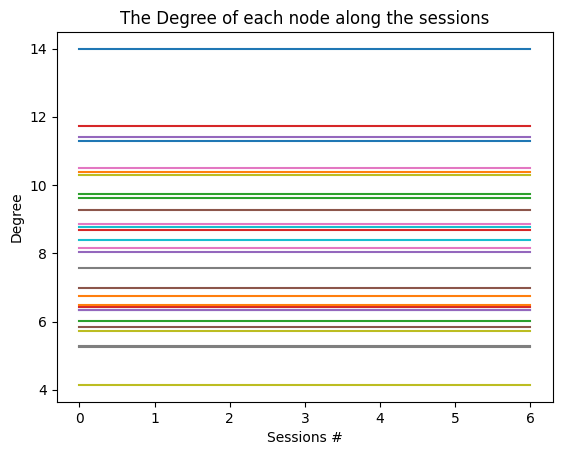

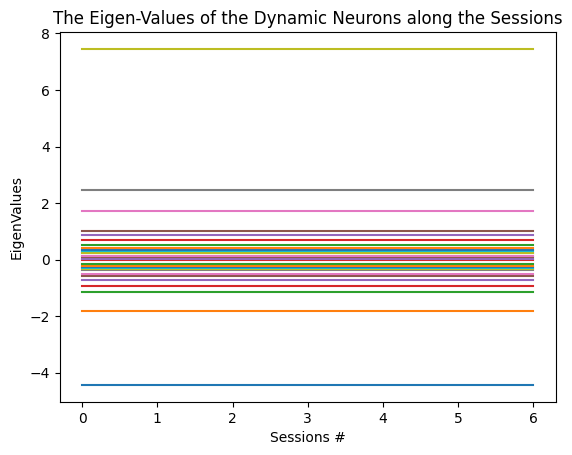

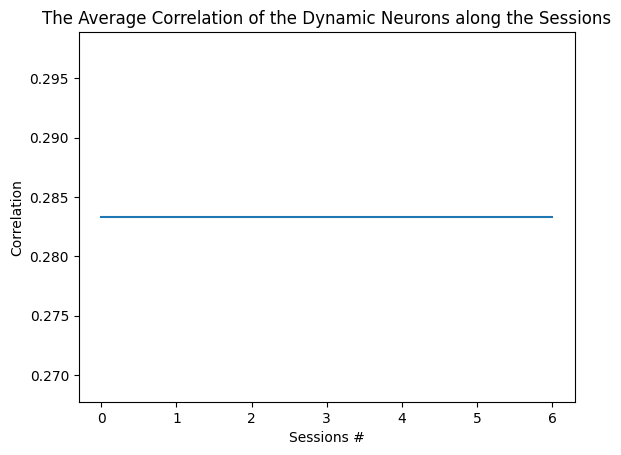

In [25]:
# Taking Subset Of Features
cc_dynamic_analysis = cc[np.tile(results_processor.dynamic_neurons, (results_processor.dynamic_neurons.size, 1)), \
    np.tile(results_processor.dynamic_neurons,  (results_processor.dynamic_neurons.size, 1)).transpose((1, 0)), :]
analyzer = ResultAnalyzer(cc_dynamic_analysis, results_processor.dynamic_neurons, sessions_order)
#analyzer.community_analysis()

analyzer.degree_analysis()
plt.figure()
plt.plot(analyzer.degs_session)
plt.title("The Degree of each node along the sessions")
plt.xlabel("Sessions #")
plt.ylabel("Degree")

analyzer.eigen_values_analysis()
plt.figure()
plt.plot(analyzer.eigen_values)
plt.title("The Eigen-Values of the Dynamic Neurons along the Sessions")
plt.xlabel("Sessions #")
plt.ylabel("EigenValues")

analyzer.avg_corr_analysis()
plt.figure()
plt.plot(analyzer.avg_corr_session)
plt.title("The Average Correlation of the Dynamic Neurons along the Sessions")
plt.xlabel("Sessions #")
plt.ylabel("Correlation")

OSError: unrecognized data stream contents when reading image file

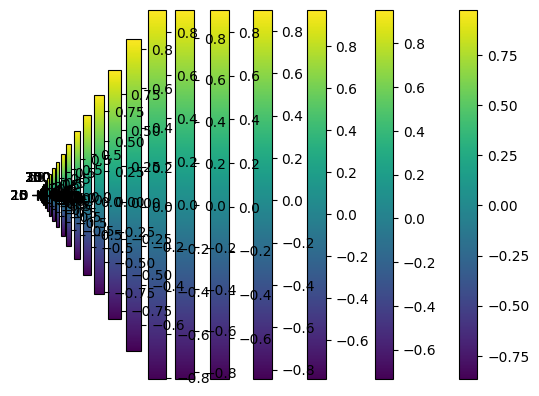

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Create an array of matrices (for example)
matrices = analyzer.adjacency_matrix

# Set up the figure and axis
fig, ax = plt.subplots()

# Function to update the figure
def update_matrix(matrix):
    ax.clear()
    cax = ax.matshow(matrix, cmap='viridis')
    fig.colorbar(cax)

# Create a list to hold the frames
frames = []

# Generate frames
for matrix in matrices:
    update_matrix(matrix)
    # Save the current frame
    plt.savefig('frame.png')
    frame = Image.open('frame.png')
    frames.append(frame)

# Save frames as a GIF
frames[0].save('matrices.gif', save_all=True, append_images=frames[1:], duration=500, loop=0)

# Clean up the saved frame images
import os
os.remove('frame.png')

print("GIF saved as 'matrices.gif'")



Text(0, 0.5, 'Correlation')

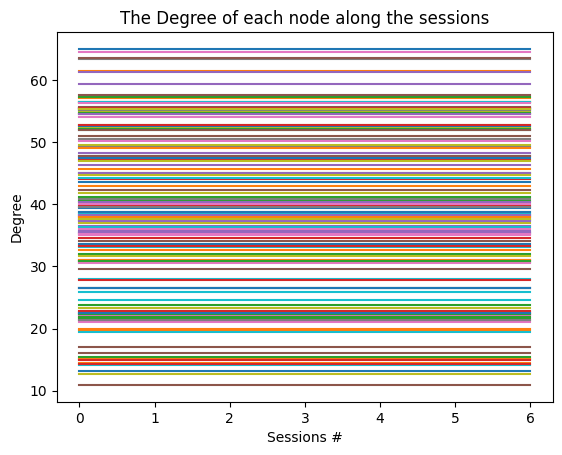

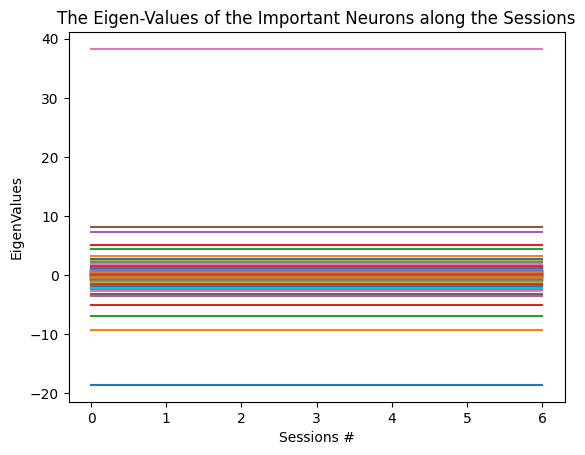

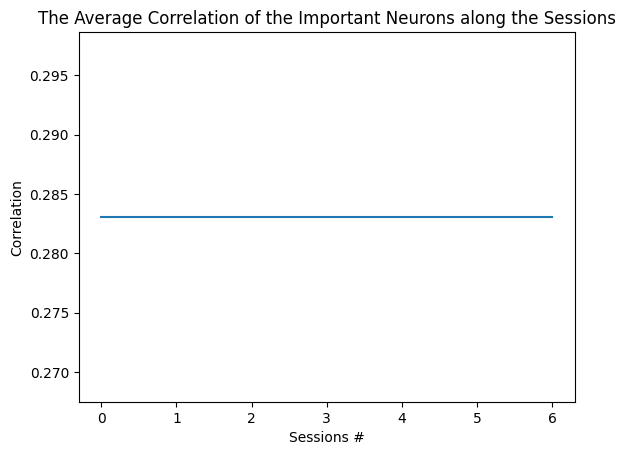

In [6]:
cc_important_analysis = cc[results_processor.important_neurons[:, None, None], results_processor.important_neurons[None, :, None], :].squeeze()
analyzer_imp = ResultAnalyzer(cc_important_analysis, results_processor.important_neurons, sessions_order)
#analyzer.community_analysis()
analyzer_imp.degree_analysis()
plt.figure()
plt.plot(analyzer_imp.degs_session)
plt.title("The Degree of each node along the sessions")
plt.xlabel("Sessions #")
plt.ylabel("Degree")

analyzer_imp.eigen_values_analysis()
plt.figure()
plt.plot(analyzer_imp.eigen_values)
plt.title("The Eigen-Values of the Important Neurons along the Sessions")
plt.xlabel("Sessions #")
plt.ylabel("EigenValues")

analyzer_imp.avg_corr_analysis()
plt.figure()
plt.plot(analyzer_imp.avg_corr_session)
plt.title("The Average Correlation of the Important Neurons along the Sessions")
plt.xlabel("Sessions #")
plt.ylabel("Correlation")



TypeError: Invalid shape (0,) for image data

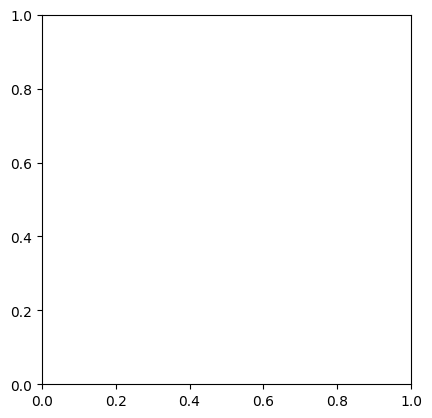

In [7]:
## All Neurons
analyzer_all = ResultAnalyzer(cc, np.linspace(0, cc.shape[0]-1, cc.shape[0]).astype("int"), sessions_order)
analyzer_all.degree_analysis()
analyzer_all.eigen_values_analysis()
analyzer_all.avg_corr_analysis()
analyzer_all.plot_analysis_results("all", os.path.join(os.path.dirname(results_path), 'all'))



In [ ]:
## Correlation Between SubSets:
subset_analyzer = GroupResultAnalyzer([analyzer_imp, analyzer, analyzer_all], ["important", "dynamic", "all"], cc, sessions_order)
subset_analyzer.corr_analysis(["important", "dynamic", "all"])
subset_analyzer.plot_results(os.path.join(os.path.dirname(results_path), 'subsets'), ["important", "dynamic", "all"])